In [1]:
from sklearn.manifold import TSNE
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pandas as pd
from scipy.ndimage import gaussian_filter
warnings.filterwarnings("ignore")

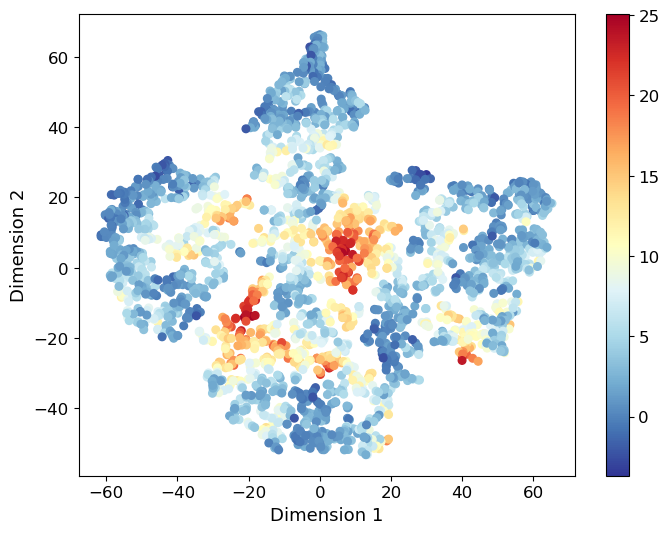

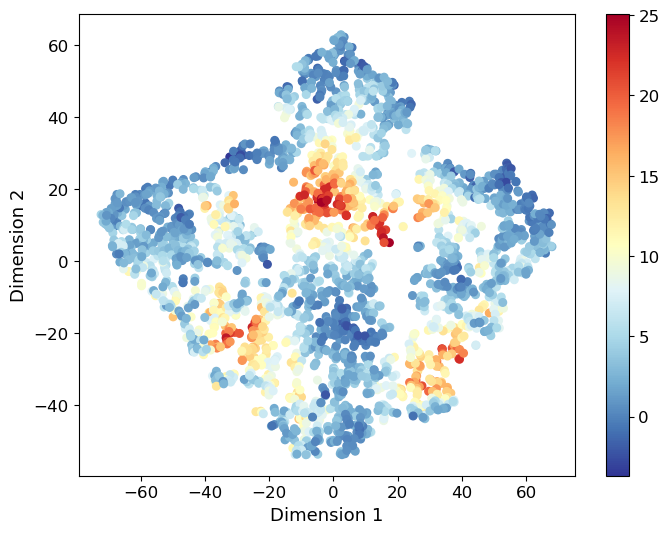

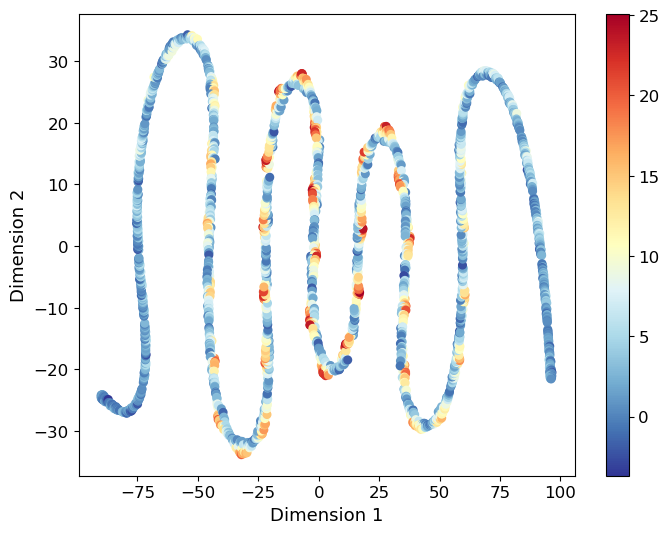

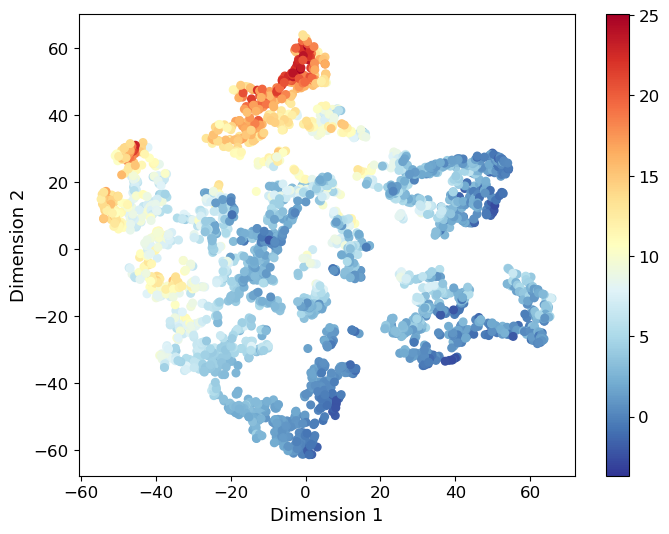

In [2]:
# # 1. 读取数据
data1 = pd.read_csv(r'./Figure/test_gcn_mlp_out0_mmd.csv', header=None).values  # 或者用 pd.read_csv('路径')，取决于文件路径
data2 = pd.read_csv(r'./Figure/test_gcn_mlp_out0_no_mmd.csv', header=None).values  # 或者用 pd.read_csv('路径')，取决于文件路径
# data3 = pd.read_csv(r'./\Figure/test_out0.csv').values  # 或者用 pd.read_csv('路径')，取决于文件路径
data3 = pd.read_csv(r'./Figure/test_out0.csv').values  # 或者用 pd.read_csv('路径')，取决于文件路径
data4 = pd.read_csv(r'./Figure/test_gcn_mlp_mmd_no_res.csv', header=None).values  # 或者用 pd.read_csv('路径')，取决于文件路径
data5 = pd.read_csv(r'./Figure/test_gcn_mlp_no_mmd_no_res.csv', header=None).values  # 或者用 pd.read_csv('路径')，取决于文件路径
y_sampled = data3[:, 6] 

tsne = TSNE(n_components=2, random_state=42, perplexity=30,n_iter=1500)
X_tsne1 = tsne.fit_transform(data1)
# 可视化连续值颜色映射
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_tsne1[:, 0], X_tsne1[:, 1],
    c=y_sampled,  # 直接使用原始房价值
    cmap="RdYlBu_r",  # 红-黄-蓝渐变（反转颜色条）
    alpha=1.0,
    s=30
)
# 添加颜色条
cbar = plt.colorbar(scatter)
# cbar.set_label("Target",size=13)
# # 调整颜色条刻度字体大小

plt.tick_params(axis='both',labelsize=12)
# 调整颜色条刻度字体大小
cbar.ax.tick_params(labelsize=12)

# plt.title("t-SNE Visualization with Continuous Price (California Housing)")
plt.xlabel("Dimension 1",size=13)
plt.ylabel("Dimension 2",size=13)
# plt.savefig("./Latex Source file\Figure/tsne_mmd.png", dpi=600, bbox_inches="tight")
plt.show()


X2_tsne = tsne.fit_transform(data2)
# 可视化连续值颜色映射
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X2_tsne[:, 0], X2_tsne[:, 1],
    c=y_sampled,  # 直接使用原始房价值
    cmap="RdYlBu_r",  # 红-黄-蓝渐变（反转颜色条）
    alpha=1.0,
    s=30
)
# 添加颜色条
cbar = plt.colorbar(scatter)
plt.tick_params(axis='both',labelsize=12)
# 调整颜色条刻度字体大小
cbar.ax.tick_params(labelsize=12)

# cbar.set_label("Target",size=13)
# plt.title("t-SNE Visualization with Continuous Price (California Housing)")
plt.xlabel("Dimension 1",size=13)
plt.ylabel("Dimension 2",size=13)
# plt.savefig("./Latex Source file\Figure/tsne_no_mmd.png", dpi=600, bbox_inches="tight")
plt.show()


y_sampled3 = data3[:, 6]
X3_tsne = tsne.fit_transform(data3)
# 可视化连续值颜色映射
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X3_tsne[:, 0], X3_tsne[:, 1],
    c=y_sampled3,  # 直接使用原始房价值
    cmap="RdYlBu_r",  # 红-黄-蓝渐变（反转颜色条）
    alpha=1.0,
    s=30
)
# 添加颜色条
cbar = plt.colorbar(scatter)
plt.tick_params(axis='both',labelsize=12)
# 调整颜色条刻度字体大小
cbar.ax.tick_params(labelsize=12)

# cbar.set_label("Target",size=13)
# plt.title("t-SNE Visualization with Continuous Price (California Housing)")
plt.xlabel("Dimension 1",size=13)
plt.ylabel("Dimension 2",size=13)
# plt.savefig("./Latex Source file\Figure/tsne_mmd_no_res.png", dpi=600, bbox_inches="tight")
plt.show()



X4_tsne = tsne.fit_transform(data4)
# 可视化连续值颜色映射
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X4_tsne[:, 0], X4_tsne[:, 1],
    c=y_sampled,  # 直接使用原始房价值
    cmap="RdYlBu_r",  # 红-黄-蓝渐变（反转颜色条）
    alpha=1.0,
    s=30
)
# 添加颜色条
cbar = plt.colorbar(scatter)
plt.tick_params(axis='both',labelsize=12)
# 调整颜色条刻度字体大小
cbar.ax.tick_params(labelsize=12)

# cbar.set_label("Target",size=13)
# plt.title("t-SNE Visualization with Continuous Price (California Housing)")
plt.xlabel("Dimension 1",size=13)
plt.ylabel("Dimension 2",size=13)
# plt.savefig("./Latex Source file\Figure/tsne_no_mmd_no_res.png", dpi=600, bbox_inches="tight")
plt.show()


插值数据已保存到文件: ./Figure/V1_真实_插值.csv
插值数据已保存到文件: ./Figure/V1_SAM_插值.csv


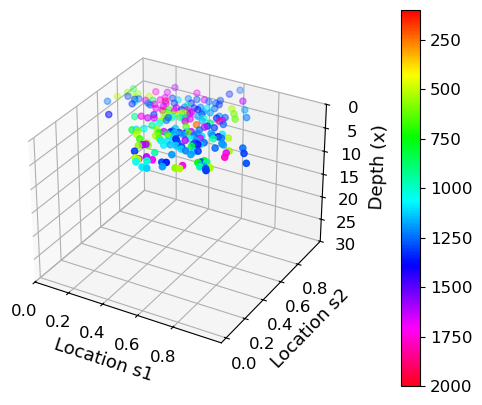

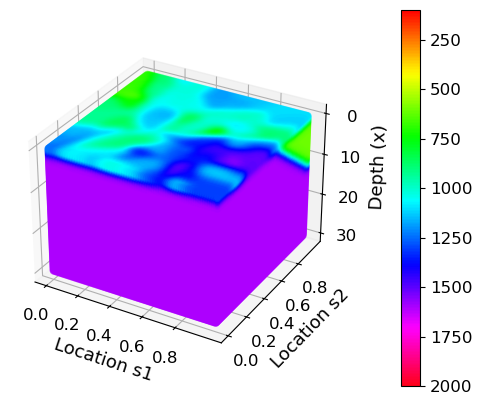

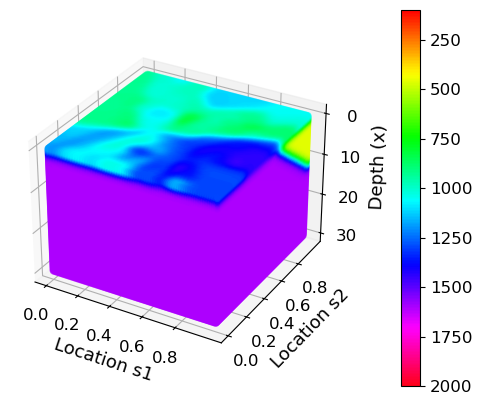

In [3]:



data = pd.read_csv(r"./Figure/Near-surface _test_out0.csv", encoding='GBK')
data = np.array(data)
s1 = data[:, 1]
s2 = data[:, 2]

H0 = data[:, 4]
H1 = data[:, 6]
V0 = data[:, 5]  # v0-true
V1 = data[:, 7]  # v1-true
SAM_V1 = data[:,8]  # GOS—Kriging-V1
# 创建 3D 图形
fig = plt.figure(figsize=(5, 5))
# 原始散点图
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(s1, s2, H1, c=V1, cmap='hsv', marker='o', vmin=100, vmax=2000)  # 设置 vmin 和 vmax
ax.set_xlabel('Location s1',size=13)
ax.set_ylabel('Location s2',size=13)
ax.set_zlabel('Depth (x)',size=13)
ax.set_zlim(0, 30)
ax.invert_zaxis()  # 翻转纵轴
ax.set_xticks(np.arange(0, 1,0.2))
ax.set_yticks(np.arange(0, 1,0.2))
cbar = plt.colorbar(sc,pad=0.13,aspect=20,shrink=0.8)
# cbar.set_label('True Values',size=15)
cbar.ax.invert_yaxis()
plt.tick_params(axis='both',labelsize=12)
# 调整颜色条刻度字体大小
cbar.ax.tick_params(labelsize=12)
# 设置x和y轴刻度间隔为0.2
plt.tight_layout()
plt.savefig(r'./Figure/V1_test.png',dpi=600)


fig = plt.figure(figsize=(5, 5))
# 插值网格生成
grid_x, grid_y, grid_z = np.mgrid[0:1:100j, 0:1:100j, 0:30:100j]  # 网格化的坐标 (s1, s2, x)
# 对目标值 y 进行插值
points = np.array(list(zip(s1, s2, H1)))  # 需要将 (s1, s2, x) 合并成一个 (N, 3) 数组
grid_y_values = griddata(points, V1, (grid_x, grid_y, grid_z), method='nearest')  # cubic 或
# 对插值结果进行平滑处理
grid_y_values = gaussian_filter(grid_y_values, sigma=3)  # 高斯平滑，sigma 控制平滑程度
import pandas as pd
# 将网格数据和插值结果保存为 DataFrame
data = {
    "s1": grid_x.flatten(),
    "s2": grid_y.flatten(),
    "depth": grid_z.flatten(),
    "target": grid_y_values.flatten(),
}
df = pd.DataFrame(data)
# 保存到 CSV 文件
csv_path = "./Figure/V1_真实_插值.csv"  # 本地保存路径，可更改为所需路径
df.to_csv(csv_path, index=False)
print(f"插值数据已保存到文件: {csv_path}")
# 插值后的 3D 图形
ax1 = fig.add_subplot(111, projection='3d')
sc1 = ax1.scatter(grid_x.flatten(), grid_y.flatten(), grid_z.flatten(),
    c=grid_y_values.flatten(), cmap='hsv', vmin=100, vmax=2000 )
ax1.set_xlabel('Location s1',size=13)
ax1.set_ylabel('Location s2',size=13)
ax1.set_zlabel('Depth (x)',size=13)
ax1.set_xticks(np.arange(0, 1,0.2))
ax1.set_yticks(np.arange(0, 1,0.2))
ax1.invert_zaxis()  # 翻转纵轴
cbar1 = plt.colorbar(sc1,pad=0.13,aspect=20,shrink=0.8)
# cbar1.set_label('Interpolation of true values',size=15)
cbar1.ax.invert_yaxis()
plt.tick_params(axis='both',labelsize=12)
# 调整颜色条刻度字体大小
cbar1.ax.tick_params(labelsize=12)
plt.tight_layout()
# plt.savefig(r'./Figure/V1_linear_interpolate.png',dpi=600)



fig = plt.figure(figsize=(5, 5))
points1 = np.array(list(zip(s1, s2, H1)))  # 需要将 (s1, s2, x) 合并成一个 (N, 3) 数组
grid_pred_y_values = griddata(points1, SAM_V1, (grid_x, grid_y, grid_z), method='nearest')  # cubic 或
# 对插值结果进行平滑处理
grid_pred_y_values = gaussian_filter(grid_pred_y_values, sigma=3)  # 高斯平滑，sigma 控制平滑程度
# 将网格数据和插值结果保存为 DataFrame
data1 = {
    "s1": grid_x.flatten(),
    "s2": grid_y.flatten(),
    "depth": grid_z.flatten(),
    "target": grid_pred_y_values.flatten(),
}
df = pd.DataFrame(data1)
# 保存到 CSV 文件
csv_path1 = "./Figure/V1_SAM_插值.csv"  # 本地保存路径，可更改为所需路径
df.to_csv(csv_path1, index=False)
print(f"插值数据已保存到文件: {csv_path1}")
# 插值后的 3D 图形
ax2 = fig.add_subplot(111, projection='3d')
sc2 = ax2.scatter(
    grid_x.flatten(), grid_y.flatten(), grid_z.flatten(),
    c=grid_pred_y_values.flatten(), cmap='hsv', vmin=100, vmax=2000  # 设置 vmin 和 vmax
)
ax2.set_xlabel('Location s1',size=13)
ax2.set_ylabel('Location s2',size=13)
ax2.set_zlabel('Depth (x)',size=13)
ax2.invert_zaxis()  # 翻转纵轴
ax2.set_xticks(np.arange(0, 1, 0.2))
ax2.set_yticks(np.arange(0, 1, 0.2))
cbar2 = plt.colorbar(sc2,pad=0.13,aspect=20,shrink=0.8)
# cbar2.set_label('Interpolation of SAM predicted values',size=15)
cbar2.ax.invert_yaxis()

plt.tick_params(axis='both',labelsize=12)
# 调整颜色条刻度字体大小
cbar2.ax.tick_params(labelsize=12)
plt.tight_layout()
# plt.savefig(r'./Figure/V1_SAM_interpolate.png',dpi=600)
plt.show()






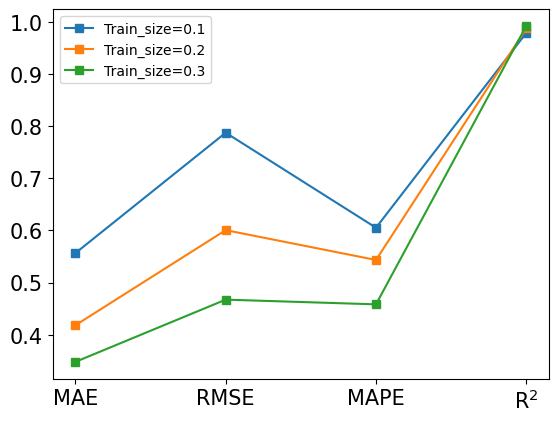

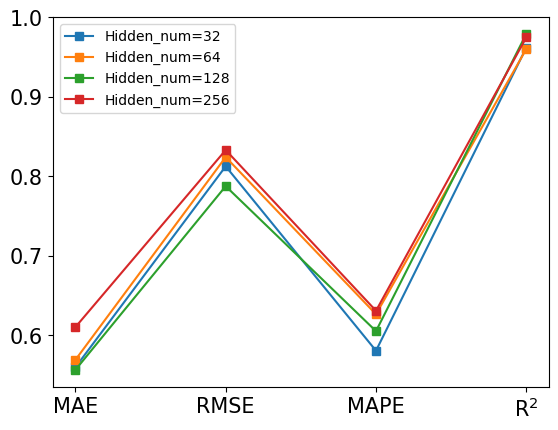

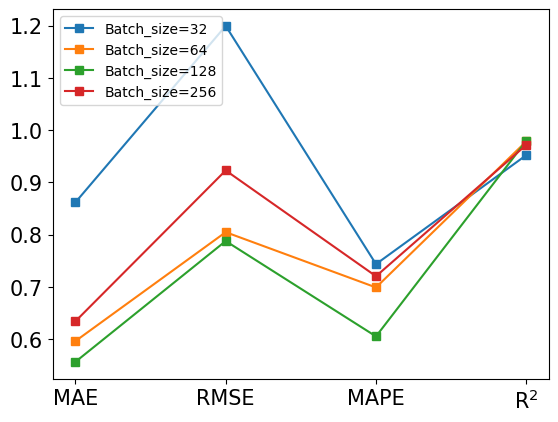

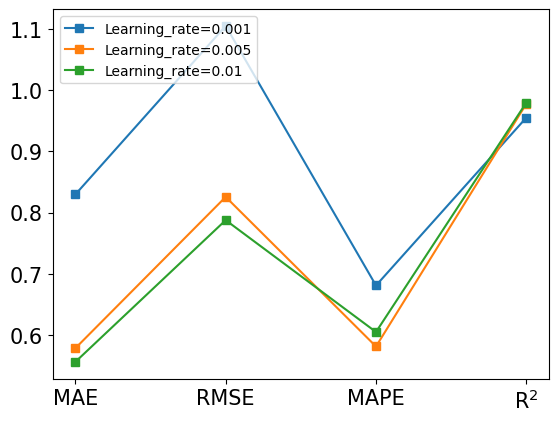

In [4]:

# #Generation 超参数 消融
x_labels =['MAE', 'RMSE',  'MAPE','R$^{2}$']

# # # # # Learning rate experiments
SAM_learning_rate1 = [0.8296, 1.1045, 0.6810, 0.9548] # 原第二个值: 0.0965 → sqrt(0.0965) ≈ 0.3106
SAM_learning_rate2 = [0.5787, 0.8255, 0.5815, 0.9773]  # 原第二个值: 0.1071 → sqrt(0.1071) ≈ 0.3272
SAM_learning_rate3 = [0.5564, 0.7876, 0.605162, 0.9793] # 原第二个值: 0.1549 → sqrt(0.1549) ≈ 0.3936
# ###Training size experiments

SAM_trainsize1 = [0.5564, 0.7876, 0.605162, 0.9793]       # 原第二个值: 0.0965 → sqrt(0.0965) ≈ 0.3106
SAM_trainsize2 = [0.4179, 0.6005, 0.543253, 0.9880]     # 原第二个值: 0.02158 → sqrt(0.02158) ≈ 0.1469
SAM_trainsize3 = [0.3476, 0.4671, 0.458052, 0.9927]      # 原第二个值: 0.0265 → sqrt(0.0265) ≈ 0.1628

# # # # # Batch size experiments
SAM_batchsize32 = [0.8616, 1.1993, 0.743438, 0.9520]    # 原第二个值: 0.1084 → sqrt(0.1084) ≈ 0.3292
SAM_batchsize64 = [0.5961, 0.8046, 0.698806, 0.9784]    # 原第二个值: 0.1060 → sqrt(0.1060) ≈ 0.3256
SAM_batchsize128 =[0.5564, 0.7876, 0.605162, 0.9793]    # 原第二个值: 0.0965 → sqrt(0.0965) ≈ 0.3106                     
SAM_batchsize256 = [0.6340, 0.9227, 0.720263, 0.9716]   # 原第二个值: 0.1346 → sqrt(0.1346) ≈ 0.3669

# # # # # Batch size experiments
SAM_hidden32 =  [0.5596, 0.8126, 0.580508, 0.9620]    # 原第二个值: 0.1159 → sqrt(0.1159) ≈ 0.3404
SAM_hidden64 =  [0.5690, 0.8242, 0.626382, 0.9603]    # 原第二个值: 0.0909 → sqrt(0.0909) ≈ 0.3015
SAM_hidden128 =[0.5564, 0.7876, 0.605162, 0.9793]     # 原第二个值: 0.0965 → sqrt(0.0965) ≈ 0.3106
SAM_hidden256 = [0.6102, 0.8331, 0.630763, 0.9749]      # 原第二个值: 0.1154 → sqrt(0.1154) ≈ 0.3397


x = np.arange(len(x_labels))
plt.plot(x,SAM_trainsize1, marker='s', label='Train_size=0.1')
plt.plot(x,SAM_trainsize2, marker='s', label='Train_size=0.2')
plt.plot(x,SAM_trainsize3,marker='s',label='Train_size=0.3')

plt.legend(loc='upper left')
plt.yticks(fontsize=15) 
plt.xticks(x, x_labels,size=15)  # 设置横坐标刻度
# plt.savefig(r'./Figure/Generation_train_size.png',dpi=500)
plt.show()
plt.close()


plt.plot(x,SAM_hidden32, marker='s', label='Hidden_num=32')
plt.plot(x,SAM_hidden64, marker='s', label='Hidden_num=64')
plt.plot(x,SAM_hidden128,marker='s',label='Hidden_num=128')
plt.plot(x,SAM_hidden256,marker='s',label='Hidden_num=256')
plt.legend(loc='upper left')
plt.yticks(fontsize=15) 
plt.xticks(x, x_labels,size=15)  # 设置横坐标刻度
# plt.savefig(r'./Figure/Generation_Hidden_num.png',dpi=500)
plt.show()
plt.close()


plt.plot(x,SAM_batchsize32, marker='s', label='Batch_size=32')
plt.plot(x,SAM_batchsize64, marker='s', label='Batch_size=64')
plt.plot(x,SAM_batchsize128,marker='s',label='Batch_size=128')
plt.plot(x,SAM_batchsize256,marker='s',label='Batch_size=256')
plt.legend(loc='upper left')
plt.yticks(fontsize=15) 
plt.xticks(x, x_labels,size=15)  # 设置横坐标刻度
# plt.savefig(r'./Figure/Generation_Batch_size.png',dpi=500)
plt.show()
plt.close()

plt.plot(x,SAM_learning_rate1,marker='s',label='Learning_rate=0.001')
plt.plot(x,SAM_learning_rate2, marker='s', label='Learning_rate=0.005')
plt.plot(x,SAM_learning_rate3, marker='s', label='Learning_rate=0.01')
plt.legend(loc='upper left')
plt.yticks(fontsize=15) 
plt.xticks(x, x_labels,size=15)  # 设置横坐标刻度
# plt.savefig(r'./Figure/Generation_Learning_rate.png',dpi=500)
plt.show()
plt.close()

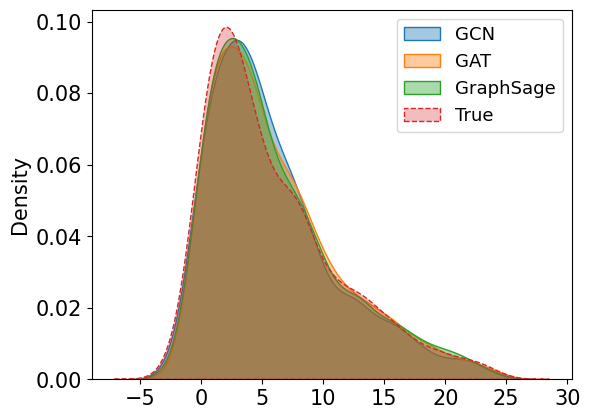

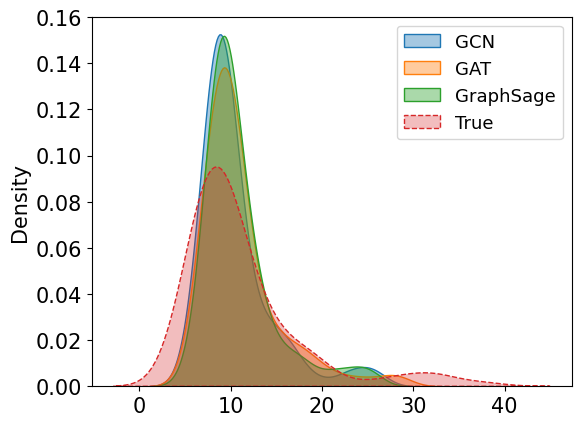

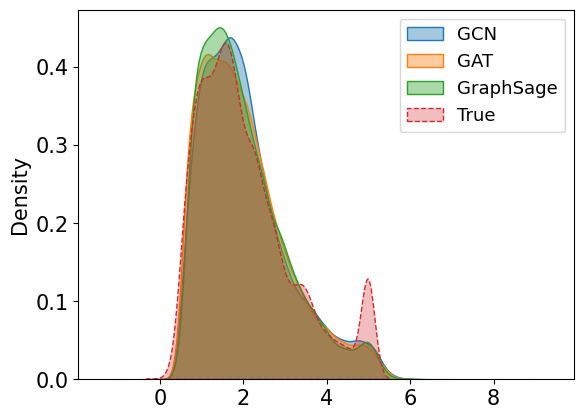

In [5]:

# # # 分布拟合图

import seaborn as sns
# 生成数据分布拟合
fig = plt.plot(figsize=(7,4) ) #创建画6
data_frame=pd.read_csv(r'./Figure/generation_test_out.csv')
data_frame=np.array(data_frame)
true=data_frame[:,6]
pred_gcn=data_frame[:,7]
pred_gat=data_frame[:,8]
pred_sage=data_frame[:,9]

sns.kdeplot(pred_gcn, alpha=0.4,label="GCN", fill=True)
sns.kdeplot(pred_gat, alpha=0.4,label="GAT", fill=True)
sns.kdeplot(pred_sage, alpha=0.4,label="GraphSage", fill=True)
sns.kdeplot(true, alpha=0.3, linestyle='--',label="True", fill=True)
plt.legend(loc='upper right',fontsize=13)
plt.ylabel("Density",size=15)
plt.subplots_adjust(left=0.15)
plt.xticks(fontsize=15)  # 设置x 轴数值的字体大小为 15
plt.yticks(fontsize=15)  # 设置 y 轴数值的字体大小为 15
# plt.savefig('./Figure/generation_distribution.png',dpi=500)
plt.show()

# Gdata 分布拟合
fig = plt.plot(figsize=(7,4) ) #创建画6
data_frame=pd.read_csv(r'./Figure/Gdata_test_out.csv')
data_frame=np.array(data_frame)
true=data_frame[:,3]
pred_gcn=data_frame[:,4]
pred_gat=data_frame[:,5]
pred_sage=data_frame[:,6]

sns.kdeplot(pred_gcn, alpha=0.4,label="GCN", fill=True)
sns.kdeplot(pred_gat, alpha=0.4,label="GAT", fill=True)
sns.kdeplot(pred_sage, alpha=0.4,label="GraphSage", fill=True)
sns.kdeplot(true, alpha=0.3, linestyle='--',label="True", fill=True)
plt.subplots_adjust(left=0.15)
plt.legend(loc='upper right',fontsize=13)
plt.ylabel("Density",size=15)
plt.xticks(fontsize=15)  # 设置x 轴数值的字体大小为 15
plt.yticks(fontsize=15)  # 设置 y 轴数值的字体大小为 15
# plt.savefig('./Figure/Gdata_distribution.png',dpi=500)
plt.show()


# California 分布拟合
fig = plt.plot(figsize=(7,4) ) #创建画6
data_frame=pd.read_csv(r'./Figure/California_test_out.csv')
data_frame=np.array(data_frame)
true=data_frame[:,3]
pred_gcn=data_frame[:,4]
pred_gat=data_frame[:,5]
pred_sage=data_frame[:,6]

sns.kdeplot(pred_gcn, alpha=0.4,label="GCN", fill=True)
sns.kdeplot(pred_gat, alpha=0.4,label="GAT", fill=True)
sns.kdeplot(pred_sage, alpha=0.4,label="GraphSage", fill=True)
sns.kdeplot(true, alpha=0.3, linestyle='--',label="True", fill=True)
plt.xticks(fontsize=15)  # 设置x 轴数值的字体大小为 15
plt.yticks(fontsize=15)  # 设置 y 轴数值的字体大小为 15
plt.legend(loc='upper right',fontsize=13)
plt.ylabel("Density",size=15)
# plt.savefig('./Figure/California_distribution.png',dpi=500)
plt.show()



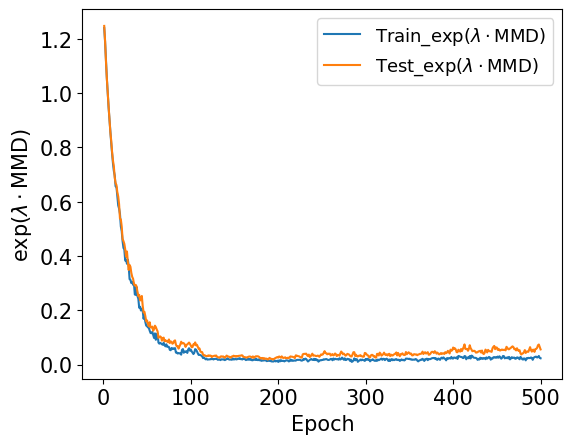

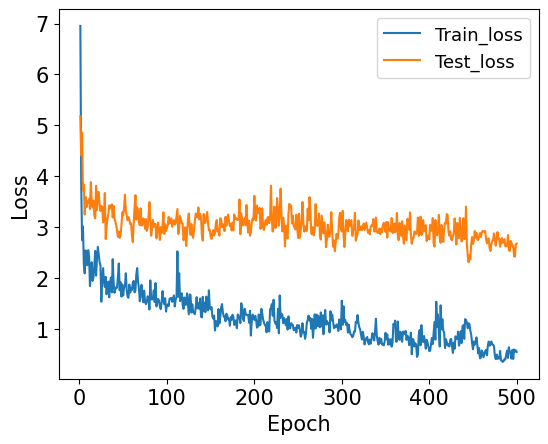

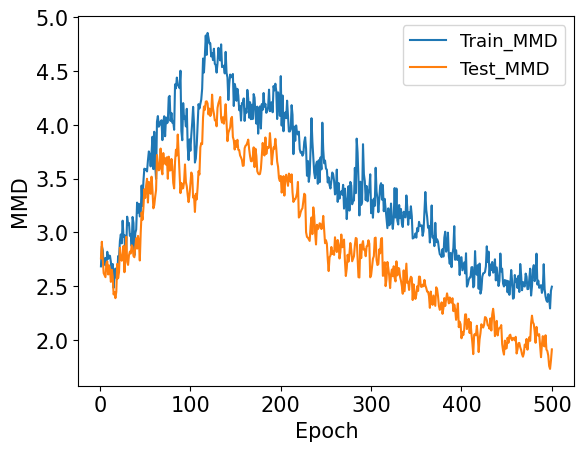

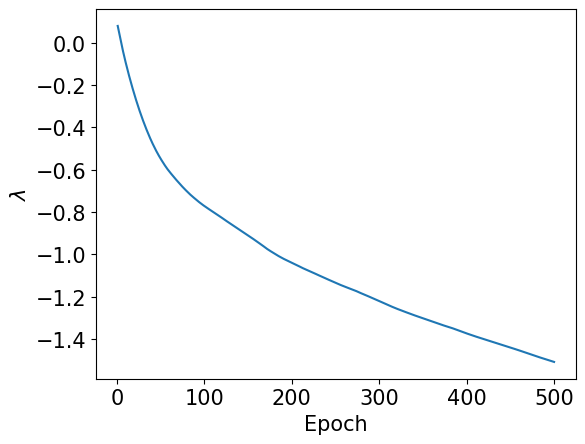

In [6]:
# # # #Gdata MMD和损失
data_frame=pd.read_csv(r'./Figure/Gdata_loss.csv')
data_frame=np.array(data_frame)
train_loss=data_frame[:,0]
# test_loss=data_frame[:,1]
test_loss=data_frame[:,6]
train_mmd=data_frame[:,2]
test_mmd=data_frame[:,3]
epoch=data_frame[:,4]
lamba=data_frame[:,5]
fig = plt.figure()


# x = np.arange(len(x_labels))

exp_train=np.exp(lamba*train_mmd)
exp_test=np.exp(lamba*test_mmd)
plt.plot(epoch,exp_train, label='Train_' r'$\exp(\lambda\cdot \mathrm{MMD})$')
plt.plot(epoch,exp_test, label='Test_' r'$\exp(\lambda\cdot \mathrm{MMD})$')
plt.legend()
plt.xlabel('Epoch',size=15)
plt.ylabel(r'$\exp(\lambda\cdot \mathrm{MMD})$',size=15)
plt.xticks(fontsize=15)  # 设置x 轴数值的字体大小为 15
plt.yticks(fontsize=15)  # 设置 y 轴数值的字体大小为 15
plt.legend(loc='upper right',fontsize=13)
plt.subplots_adjust(left=0.15)
# plt.xticks(x, x_labels,size=15)  # 设置横坐标刻度
# plt.savefig(r'./Figure/Gdata_exp(LambdaMMD)_loss.png',dpi=500)
plt.show()
plt.close()

# x = np.arange(len(x_labels))
plt.plot(epoch,train_loss, label='Train_loss')
plt.plot(epoch,test_loss, label='Test_loss')

plt.legend()
plt.xlabel('Epoch',size=15)
plt.ylabel('Loss',size=15)
plt.xticks(fontsize=15)  # 设置x 轴数值的字体大小为 15
plt.yticks(fontsize=15)  # 设置 y 轴数值的字体大小为 15
plt.legend(loc='upper right',fontsize=13)
plt.subplots_adjust(left=0.15)
# plt.xticks(x, x_labels,size=15)  # 设置横坐标刻度
# plt.savefig(r'./Figure/Gdata_loss.png',dpi=500)
plt.show()
plt.close()

plt.plot(epoch,train_mmd, label='Train_MMD')
plt.plot(epoch,test_mmd,  label='Test_MMD')

plt.legend()
plt.xlabel('Epoch',size=15)
plt.ylabel('MMD',size=15)
plt.xticks(fontsize=15)  # 设置x 轴数值的字体大小为 15
plt.yticks(fontsize=15)  # 设置 y 轴数值的字体大小为 15
plt.legend(loc='upper right',fontsize=13)
# plt.xticks(x, x_labels,size=15)  # 设置横坐标刻度
# plt.savefig(r'./Figure/Gdata_MMD.png',dpi=500)
plt.show()
plt.close()

# #Lambda
fig = plt.figure()
plt.plot(epoch,lamba)
plt.subplots_adjust(left=0.15)  # 将图像右移，left 值从默认的 0.125 增大
# plt.legend()
plt.xlabel('Epoch',size=15)
plt.ylabel('$\lambda$',size=15)
plt.xticks(fontsize=15)  # 设置x 轴数值的字体大小为 15
plt.yticks(fontsize=15)  # 设置 y 轴数值的字体大小为 15
# plt.legend(loc='upper right',fontsize=13)
# plt.xticks(x, x_labels,size=15)  # 设置横坐标刻度
# plt.savefig(r'./Figure/Lambda.png',dpi=500)
plt.show()
plt.close()

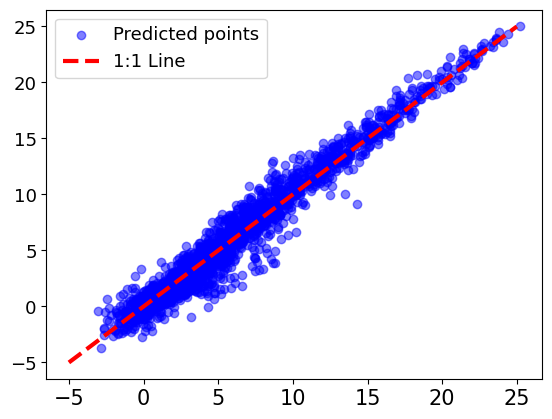

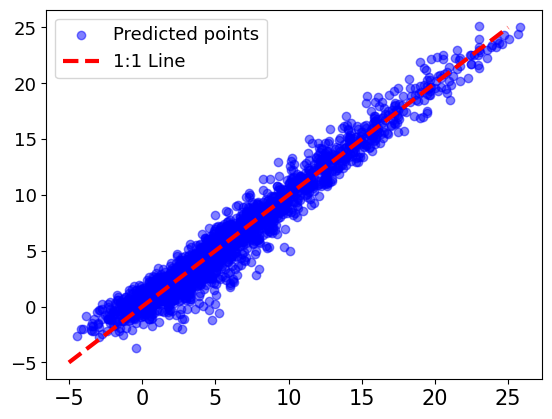

In [7]:
data_frame=pd.read_csv(r'./Figure/generation_test_out.csv')
data_frame=np.array(data_frame)
x = data_frame[:,6]
y = data_frame[:,7] # 加上一些随机噪声
fig = plt.figure()
plt.scatter(y, x, color='blue', alpha=0.5, label='Predicted points')
# 绘制对角线
plt.plot([-5, 25], [-5, 25], color='r', linewidth=3.0, linestyle='--', label='1:1 Line')

# 设置图形属性
# plt.ylabel('True',size=15)
# plt.xlabel('Prediction',size=15)
plt.xticks(fontsize=15)  # 设置x 轴数值的字体大小为 15
plt.yticks(fontsize=13)  # 设置 y 轴数值的字体大小为 15
plt.legend(fontsize=13)
# plt.savefig(r'./Figure/generatrion_SAM.png',dpi=500)
plt.show()



data_frame=pd.read_csv(r'./Figure/LEGNN-prediction_val_0.csv')
data_frame=np.array(data_frame)
x = data_frame[:,1]
y = data_frame[:,4] 
fig = plt.figure()
plt.scatter(y, x, color='blue', alpha=0.5, label='Predicted points')
# 绘制对角线
plt.plot([-5, 25], [-5, 25], color='r', linewidth=3.0, linestyle='--', label='1:1 Line')

# 设置图形属性
# plt.ylabel('True',size=15)
# plt.xlabel('Prediction',size=15)
plt.xticks(fontsize=15)  # 设置x 轴数值的字体大小为 15
plt.yticks(fontsize=13)  # 设置 y 轴数值的字体大小为 15
plt.legend(fontsize=13)
# plt.savefig(r'./Figure/generatrion_LEGNN.png',dpi=500)
plt.show()


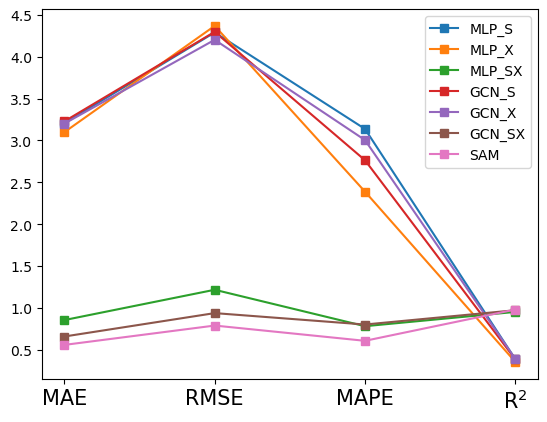

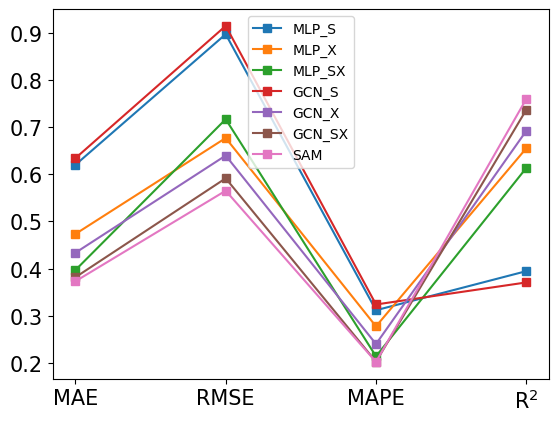

In [8]:
# #generation 模型结构消融

x_labels =['MAE', 'RMSE',  'MAPE','R$^{2}$']
Gdata_mlp_s = [3.2066, 4.2913, 3.137389, 0.3860]          # 原第二个值: 2.2103 → sqrt(2.2103) ≈ 1.4867
Gdata_mlp_x = [3.0992, 4.3694, 2.388018, 0.3535]            # 原第二个值: 1.1984 → sqrt(1.1984) ≈ 1.0947
Gdata_mlp_sx = [0.8532, 1.2154, 0.780056, 0.9507]          # 原第二个值: 0.1166 → sqrt(0.1166) ≈ 0.3415
Gdata_gcn_s = [3.2285, 4.2984, 2.763514, 0.3840]           # 原第二个值: 2.2471 → sqrt(2.2471) ≈ 1.4990
Gdata_gcn_x = [3.2013, 4.2031, 3.004428, 0.3895]           # 原第二个值: 1.1707 → sqrt(1.1707) ≈ 1.0820
Gdata_gcn_xs = [0.6568, 0.9364, 0.799893, 0.9708]          # 原第二个值: [0.7456, 1.0564, 0.8167, 0.9632] 
Gdata_SAM = [0.5564, 0.7876, 0.605162, 0.9793]             # 原第二个值: 0.0965 → sqrt(0.0965) ≈ 0.3106
fig = plt.figure()

x = np.arange(len(x_labels))
plt.plot(x,Gdata_mlp_s, marker='s', label='MLP_S')
plt.plot(x,Gdata_mlp_x, marker='s', label='MLP_X')
plt.plot(x,Gdata_mlp_sx,marker='s',label='MLP_SX')
plt.plot(x,Gdata_gcn_s,marker='s',label='GCN_S')
plt.plot(x,Gdata_gcn_x,marker='s',label='GCN_X')
plt.plot(x,Gdata_gcn_xs,marker='s',label='GCN_SX')
plt.plot(x,Gdata_SAM,marker='s',label='SAM')
plt.legend()
plt.xticks(x, x_labels,size=15)  # 设置横坐标刻度
# plt.savefig(r'./Figure/generation_abliation.png',dpi=500)
plt.show()
# plt.close()

# #California 模型结构消融
x_labels =['MAE', 'RMSE',  'MAPE','R$^{2}$']
mlp_s = [0.6200, 0.8968, 0.3120, 0.3948]      # 原第二个值: 0.8043 → sqrt(0.8043) ≈ 0.8968  
mlp_x = [0.4735, 0.6769, 0.2779, 0.6552]      # 原第二个值: 0.4582 → sqrt(0.4582) ≈ 0.6769  
mlp_sx = [0.3970, 0.7167, 0.2144, 0.6135]     # 原第二个值: 0.5137 → sqrt(0.5137) ≈ 0.7167  
gcn_s = [0.6340, 0.9144, 0.3242, 0.3709]      # 原第二个值: 0.8361 → sqrt(0.8361) ≈ 0.9144  
gcn_x = [0.4337, 0.6397, 0.2404, 0.6921]      # 原第二个值: 0.4092 → sqrt(0.4092) ≈ 0.6397  
gcn_xs = [0.3818, 0.5915, 0.2029, 0.7367]     # 原第二个值: 0.3499 → sqrt(0.3499) ≈ 0.5915  
SAM = [0.3733, 0.5652, 0.2026, 0.7596]        # 原第二个值: 0.3194 → sqrt(0.3194) ≈ 0.5652  
fig = plt.figure()

x = np.arange(len(x_labels))
plt.plot(x,mlp_s, marker='s', label='MLP_S')
plt.plot(x,mlp_x, marker='s', label='MLP_X')
plt.plot(x,mlp_sx,marker='s',label='MLP_SX')
plt.plot(x,gcn_s,marker='s',label='GCN_S')
plt.plot(x,gcn_x,marker='s',label='GCN_X')
plt.plot(x,gcn_xs,marker='s',label='GCN_SX')
plt.plot(x,SAM,marker='s',label='SAM')
plt.legend(loc='upper center')
plt.yticks(fontsize=15) 
plt.xticks(x, x_labels,size=15)  # 设置横坐标刻度
# plt.savefig(r'./Figure/\cali_abliation.png',dpi=500)
plt.show()
# plt.close()



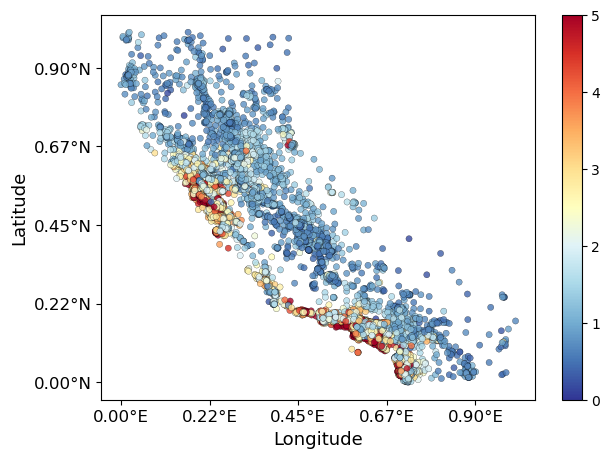

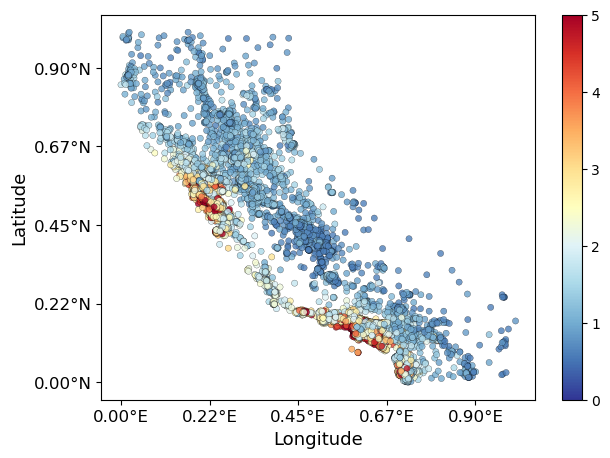

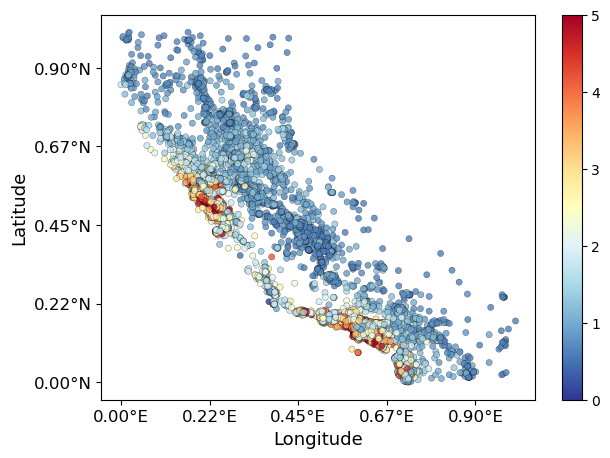

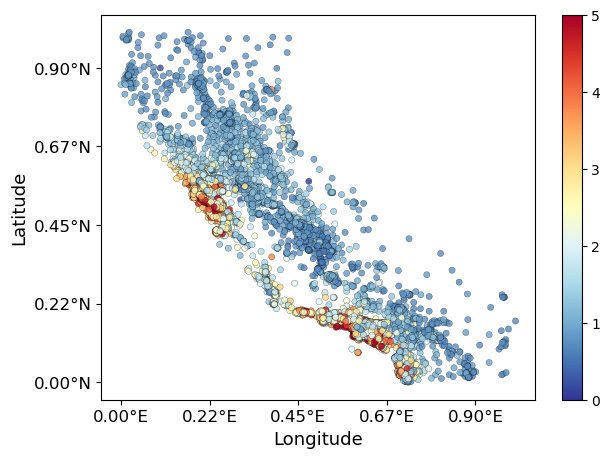

In [12]:
##california 可视化
# import os
# os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from pyproj import Transformer
# ------------------------------
# 步骤1：读取CSV数据并转换为GeoDataFrame
# ------------------------------
# 读取CSV文件（假设文件名为data.csv）


df = pd.read_csv("./Figure/California_test_out0.csv", header=None, names=['id', "latitude", "longitude","TRUE",'pred_gcn','pred_gat',	'pred_sage'])
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"  # WGS84地理坐标系
)
# 转换为Web Mercator投影坐标系（EPSG:3857）
gdf_web_mercator = gdf.to_crs(epsg=3857)

# 步骤2：定义坐标转换函数（Web Mercator米 → WGS84经纬度）
# ------------------------------
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)

def format_longitude(x, pos):
    lon, _ = transformer.transform(x, 0)  # 只转换经度
    return f"{lon:.2f}°E" if lon >= 0 else f"{-lon:.2f}°W"

def format_latitude(y, pos):
    _, lat = transformer.transform(0, y)  # 只转换纬度
    return f"{lat:.2f}°N" if lat >= 0 else f"{-lat:.2f}°S"

# ------------------------------
# 步骤3：绘制带高德底图的热力图
# ------------------------------

label=["TRUE",'pred_gcn','pred_gat',	'pred_sage']
for i in range(len(label)):
    fig, ax= plt.subplots(figsize=(7, 5))
    # 绘制温度点
    gdf_web_mercator.plot(
        column="{}".format(label[i]),
        cmap="RdYlBu_r",
        markersize=20,
        alpha=0.8,
        vmin=0,                 # 颜色条最小值
        vmax=5,
        legend=True,
        # legend_kwds={"label": "Price", "shrink": 0.6},
        edgecolor="k",
        linewidth=0.2,
        ax=ax
    )

    # ------------------------------
    # 应用自定义格式化器
    ax.xaxis.set_major_formatter(FuncFormatter(format_longitude))
    ax.yaxis.set_major_formatter(FuncFormatter(format_latitude))

    # 设置坐标轴标签和字体
    ax.set_xlabel("Longitude", fontsize=13)
    ax.set_ylabel("Latitude", fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # 调整刻度密度以避免重叠
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    # 确保底图与坐标轴对齐
    ax.set_aspect('auto')
    plt.show()
    plt.savefig("./Figure/Califor_{}.png".format(label[i]), dpi=600, bbox_inches="tight")
    plt.close()




